In [1]:
from file_combiner import transaction_compiler
from tests import map_test, null_cat_plot, null_retailer_plot
from mapper import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 100)

In [2]:
df = transaction_compiler()

In [3]:
map_test(df)[:5]

,original_null_count,cleaned_null_count,percent_null_count_difference
Category,1016,81,0.92
retailer,3448,630,0.82
Balance,2834,2834,0.00
not_nulls,0,0,0.00
is_recurring,0,0,0.00


In [4]:
df.shape[0]

3448

In [8]:
(df.isnull().sum()/df.shape[0]).sort_values()

Date                            0.000000
Description                     0.000000
is_recurring                    0.000000
month_year                      0.000000
Amount                          0.000000
year                            0.000000
month                           0.000000
month_name                      0.000000
clean_description               0.000000
account_number                  0.000000
account_type                    0.000000
bank                            0.000000
not_nulls                       0.000000
file_name                       0.000000
retailer                        0.182715
Type                            0.285963
Category                        0.294664
Reference                       0.789443
Appears On Your Statement As    0.789443
Extended Details                0.789443
Account #                       0.789443
Card Member                     0.789443
Country                         0.813225
Address                         0.813515
Zip Code        

In [6]:
# df[df['Description'].str.contains('blackberry market',case=False, regex=True)]

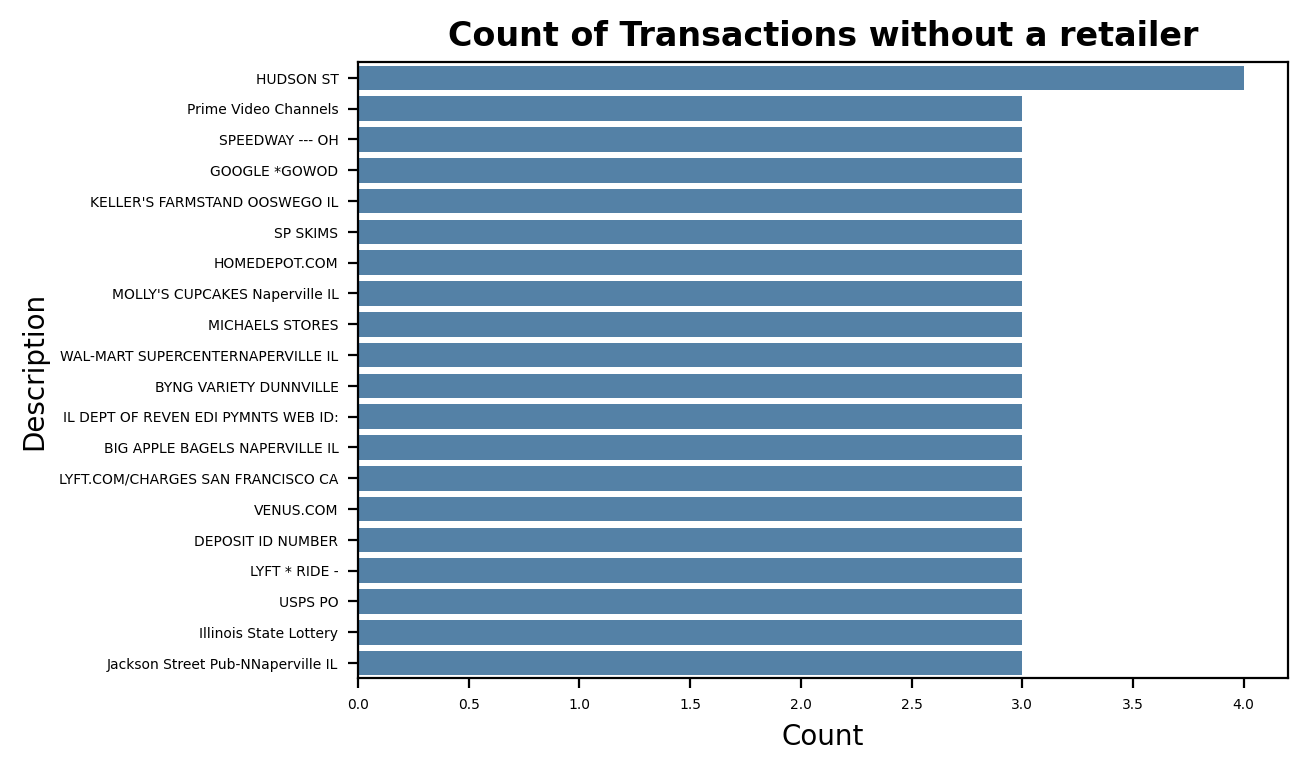

In [7]:
null_retailer_plot(df)

In [23]:
# null_cat_plot(df)

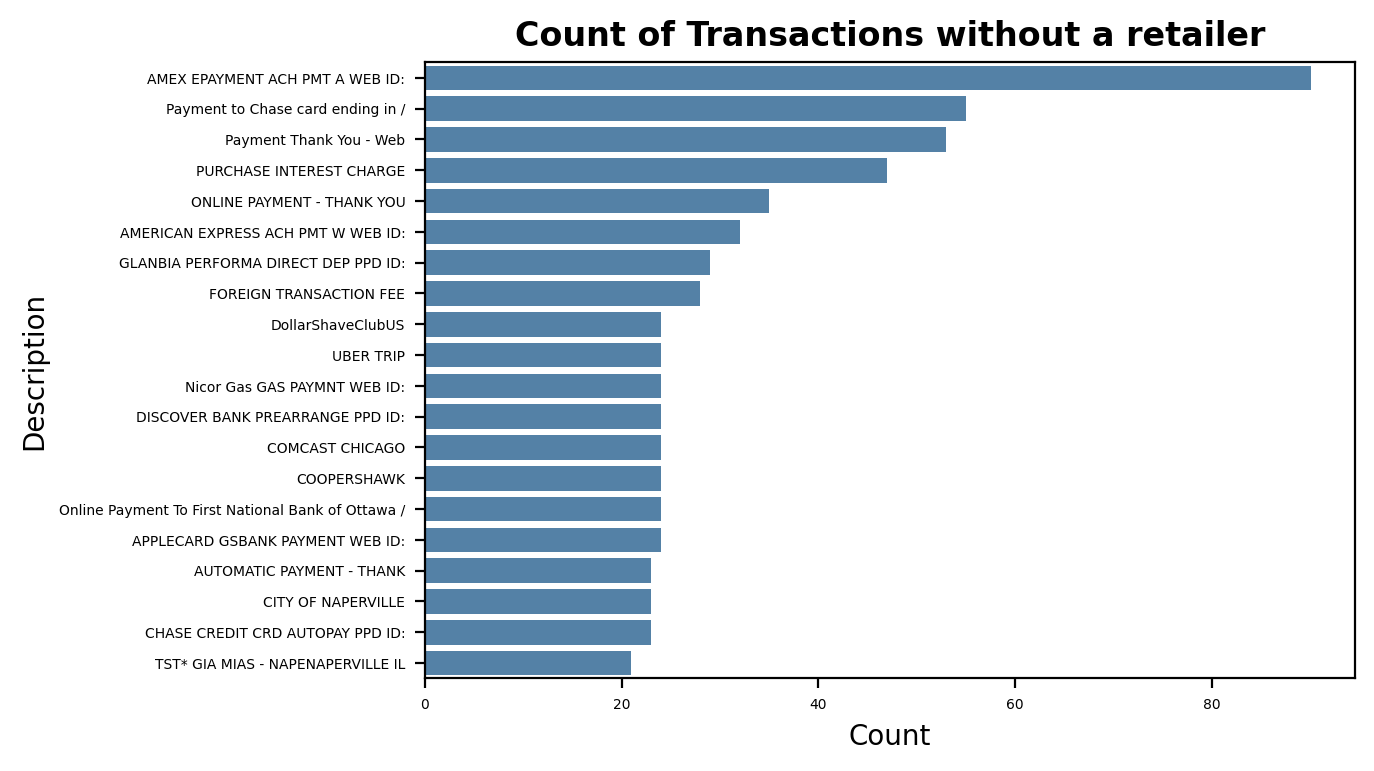

In [4]:
null_retailer_plot(df)

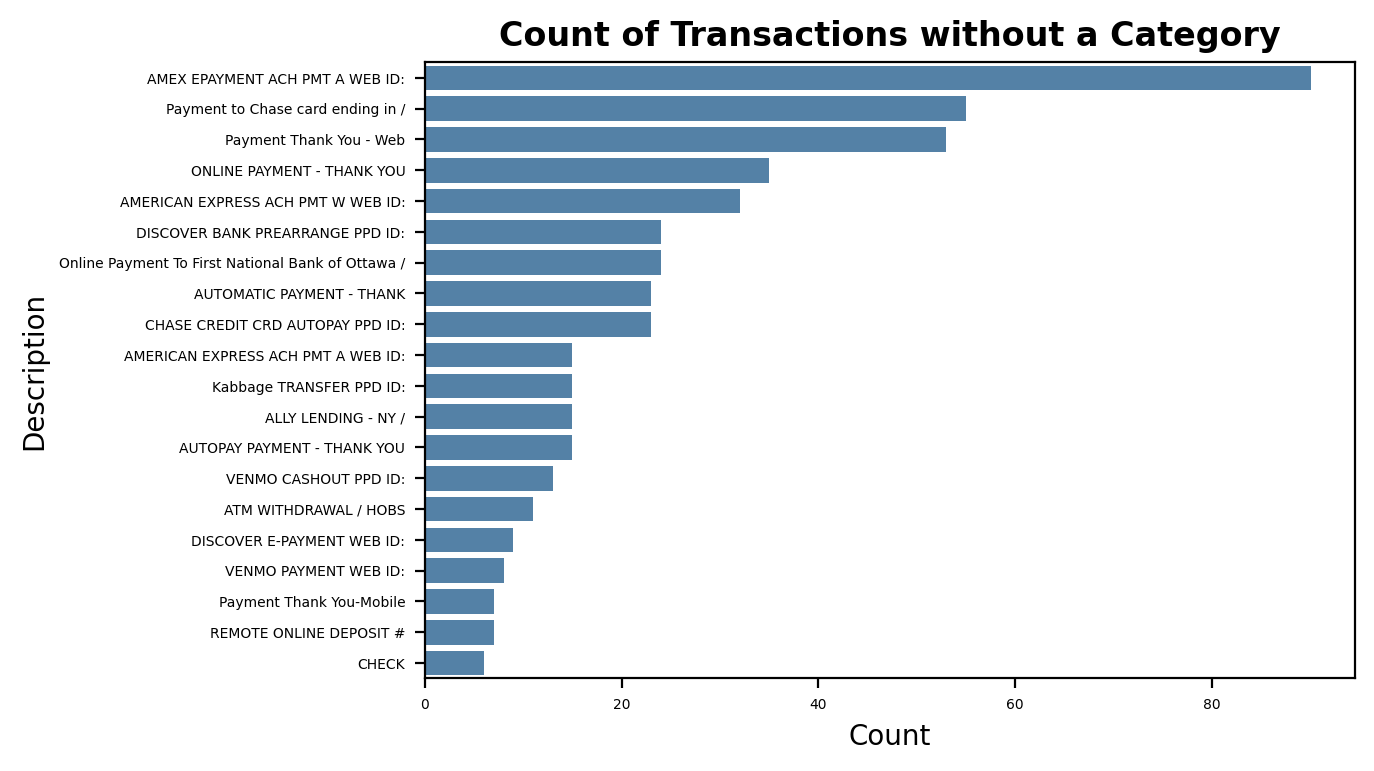

In [4]:
null_cat_plot(df)

In [6]:
map_test(df)


,original_null_count,cleaned_null_count,percent_null_count_difference
Date,0,0,0.0
Description,0,0,0.0
Card Member,2722,2722,0.0
Account #,2722,2722,0.0
Amount,0,0,0.0
Extended Details,2722,2722,0.0
Appears On Your Statement As,2722,2722,0.0
Address,2805,2805,0.0
City/State,2806,2806,0.0
Zip Code,2806,2806,0.0


In [8]:
# df['retailer']

KeyError: 'retailer'

In [69]:
null_cats = df.loc[df['Category'].isnull()]

In [5]:
df.columns

Index(['Date', 'Description', 'Card Member', 'Account #', 'Amount',
       'Extended Details', 'Appears On Your Statement As', 'Address',
       'City/State', 'Zip Code', 'Country', 'Reference', 'Category',
       'file_name', 'Details', 'Type', 'Balance', 'Check or Slip #',
       'Transaction', 'Memo', 'bank', 'account_type', 'account_number',
       'clean_description', 'month_name', 'month', 'year', 'month_year',
       'is_recurring', 'not_nulls'],
      dtype='object')

In [72]:
null_cats['Description'].str.replace(r'\s+', ' ', regex=True)

12      Payment to Chase card ending in 4649 06/13
13      Payment to Chase card ending in 4434 06/13
14                         Payment Thank You - Web
15                         Payment Thank You - Web
17                                     CHECK 1770 
                           ...                    
3442       AMZN Mktp US*RD8OC1F71 Amzn.com/bill WA
3443       AMZN Mktp US*8C3TA2YA3 Amzn.com/bill WA
3444         Amazon.com*7V72Y0233 Amzn.com/bill WA
3446                TARGET 00019034 WARRENVILLE IL
3447               AMAZON.COM*7C13H8QH3 SEATTLE WA
Name: Description, Length: 1016, dtype: object

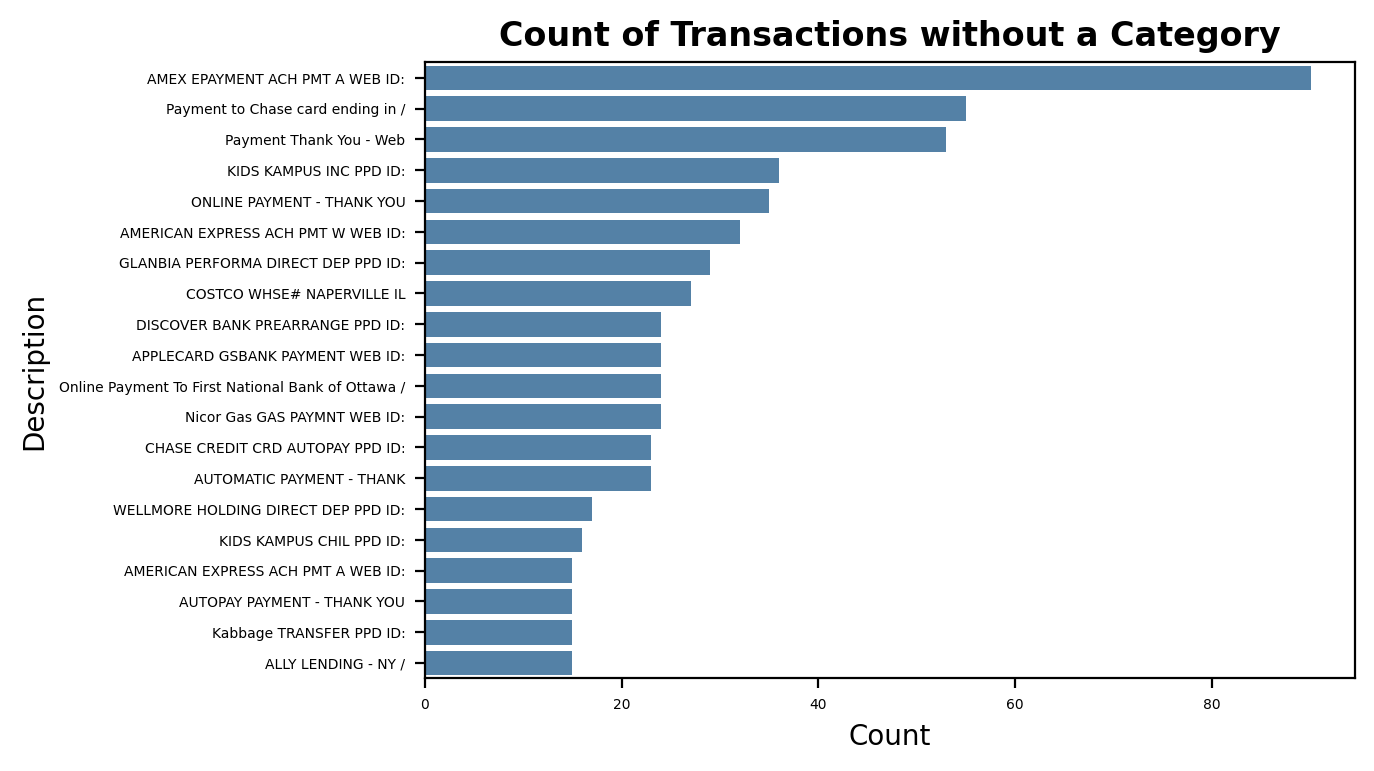

In [80]:
def null_cat_plot(frame):
    null_cats = frame.loc[frame['retailer'].isnull()]


    #Remove all numbers from the description column to remove unique identifiers that could segment the descriptions unneccessarily
    null_cats.loc[:,'Description'] = null_cats['Description'].str.replace('[0-9]','', regex=True)
    #Remove extra whitepace between Description values and replace with a single whitespace
    null_cats.loc[:,'Description'] = null_cats['Description'].str.replace(r'\s+', ' ', regex=True)
    #Remove trailing and leading whitespace
    null_cats.loc[:,'Description'] = null_cats['Description'].str.strip()


    val_counts = null_cats.value_counts('Description')

    #Plot values 
    plt.figure(figsize=(6,4),dpi=200)
    sns.barplot(y = val_counts.index[:20], x= val_counts.values[:20],color='steelblue')

    #Formatting the plot
    plt.ylabel('Description', fontdict={'weight':500})
    plt.xlabel('Count', fontdict={'weight':500})
    plt.title('Count of Transactions without a Category',fontdict={'weight':900},loc='center')
    plt.yticks(fontsize=5)
    plt.xticks(fontsize=5)
    
    return plt.show()

cat_plot(df)

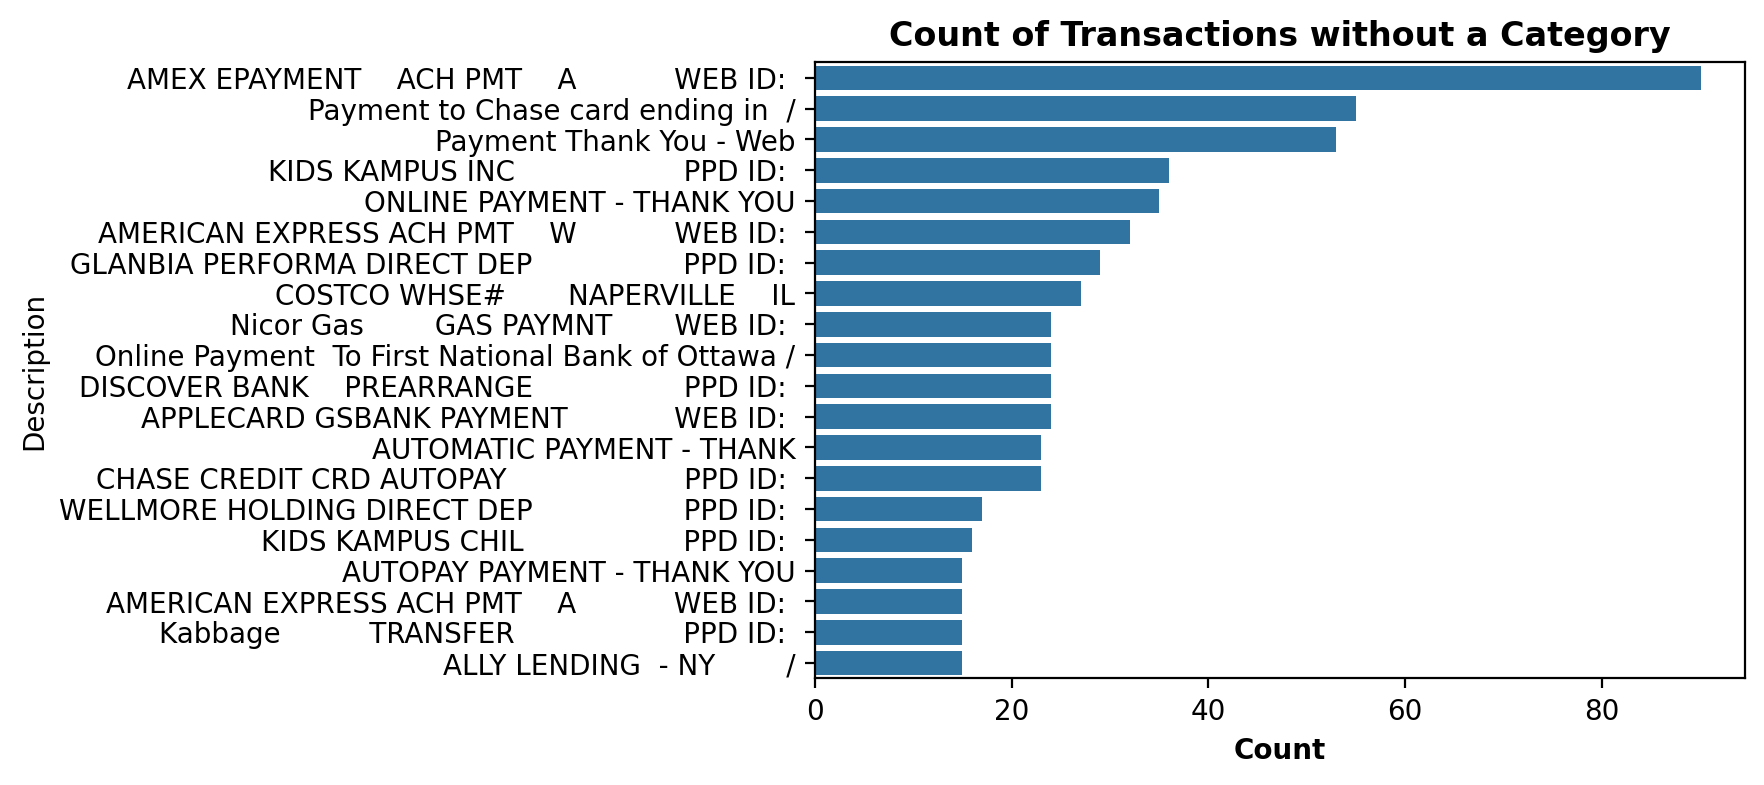

In [40]:
cat_plot(df)



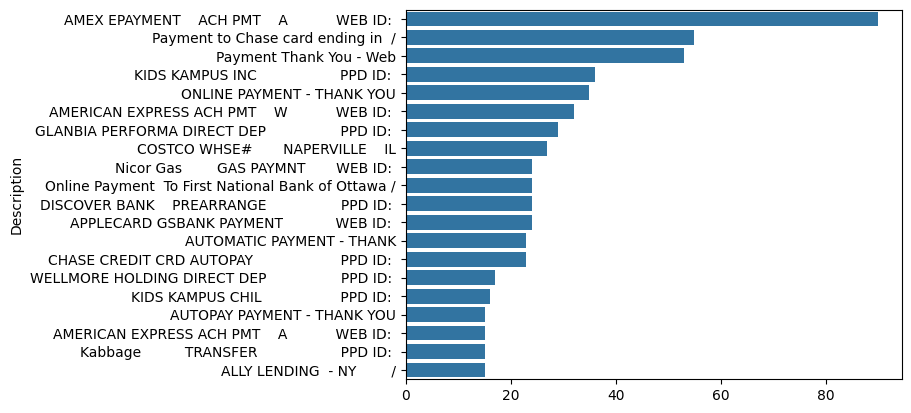

In [18]:
sns.barplot(y = val_counts.index[:20], x= val_counts.values[:20])
p = plt.show()

In [16]:
df[df['Description'].str.contains('Amex Epayment',case=False)]

,Date,Description,Card Member,Account #,Amount,Extended Details,Appears On Your Statement As,Address,City/State,Zip Code,Country,Reference,Category,file_name,Details,Type,Balance,Check or Slip #,Transaction,Memo,bank,account_type,account_number,clean_description,month_name,month,year,month_year,is_recurring,not_nulls
67,2022-06-24,AMEX EPAYMENT ACH PMT A1030 WEB ID: 6133133497,NaN,NaN,-336.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,28335.27,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A1030 WEB ID: 6133133497,June,6.0,2022.0,Jun-2022,0.0,16
81,2022-06-27,AMEX EPAYMENT ACH PMT A1460 WEB ID: 6133133497,NaN,NaN,-517.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,22195.79,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A1460 WEB ID: 6133133497,June,6.0,2022.0,Jun-2022,0.0,16
111,2022-07-01,AMEX EPAYMENT ACH PMT A1920 WEB ID: 6133133497,NaN,NaN,-645.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,18253.14,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A1920 WEB ID: 6133133497,July,7.0,2022.0,Jul-2022,0.0,16
231,2022-07-25,AMEX EPAYMENT ACH PMT A6780 WEB ID: 6133133497,NaN,NaN,-336.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,16991.76,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A6780 WEB ID: 6133133497,July,7.0,2022.0,Jul-2022,0.0,16
244,2022-07-27,AMEX EPAYMENT ACH PMT A1590 WEB ID: 6133133497,NaN,NaN,-517.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,10272.73,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A1590 WEB ID: 6133133497,July,7.0,2022.0,Jul-2022,1.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,2024-05-01,AMEX EPAYMENT ACH PMT A2340 WEB ID: 6133133497,NaN,NaN,-645.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,10634.06,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A2340 WEB ID: 6133133497,May,5.0,2024.0,May-2024,0.0,16
3347,2024-05-28,AMEX EPAYMENT ACH PMT A0624 WEB ID: 6133133497,NaN,NaN,-683.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,9262.49,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A0624 WEB ID: 6133133497,May,5.0,2024.0,May-2024,0.0,16
3348,2024-05-28,AMEX EPAYMENT ACH PMT A5042 WEB ID: 6133133497,NaN,NaN,-517.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,8080.39,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A5042 WEB ID: 6133133497,May,5.0,2024.0,May-2024,0.0,16
3358,2024-05-28,AMEX EPAYMENT ACH PMT A0594 WEB ID: 6133133497,NaN,NaN,-336.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase_checking_9333_Activity_20240611,DEBIT,ACH_DEBIT,9945.53,NaN,NaN,NaN,Chase,checking,9333.0,AMEX EPAYMENT ACH PMT A0594 WEB ID: 6133133497,May,5.0,2024.0,May-2024,0.0,16
